# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
base = pd.read_csv('demo01_tratado.csv')
base.head()

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,1,1,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,1,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,2,1,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
3,3,0,1,1,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,4,1,1,0,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [3]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              16650 non-null  int64  
 1   sexo                                    16650 non-null  int64  
 2   posse_de_veiculo                        16650 non-null  int64  
 3   posse_de_imovel                         16650 non-null  int64  
 4   qtd_filhos                              16650 non-null  int64  
 5   idade                                   16650 non-null  float64
 6   tempo_emprego                           16650 non-null  float64
 7   possui_celular                          16650 non-null  int64  
 8   possui_fone_comercial                   16650 non-null  int64  
 9   possui_fone                             16650 non-null  int64  
 10  possui_email                            16650 non-null  in

In [4]:
base.drop('Unnamed: 0', axis=1, inplace=True)

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    16650 non-null  int64  
 1   posse_de_veiculo                        16650 non-null  int64  
 2   posse_de_imovel                         16650 non-null  int64  
 3   qtd_filhos                              16650 non-null  int64  
 4   idade                                   16650 non-null  float64
 5   tempo_emprego                           16650 non-null  float64
 6   possui_celular                          16650 non-null  int64  
 7   possui_fone_comercial                   16650 non-null  int64  
 8   possui_fone                             16650 non-null  int64  
 9   possui_email                            16650 non-null  int64  
 10  qt_pessoas_residencia                   16650 non-null  fl

In [5]:
y = base.mau

x = base.drop('mau', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [6]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [7]:
clf = clf.fit(x,y)
clf

DecisionTreeClassifier(random_state=100)

[Text(0.543062591109875, 0.9848484848484849, 'tempo_emprego <= 2.747\ngini = 0.046\nsamples = 16650\nvalue = [16260, 390]\nclass = Aprovado'),
 Text(0.19743204137790013, 0.9545454545454546, 'idade <= 30.445\ngini = 0.064\nsamples = 5962\nvalue = [5765, 197]\nclass = Aprovado'),
 Text(0.06276054950660498, 0.9242424242424242, 'idade <= 30.437\ngini = 0.136\nsamples = 682\nvalue = [632, 50]\nclass = Aprovado'),
 Text(0.06050904997273575, 0.8939393939393939, 'tempo_emprego <= 2.179\ngini = 0.129\nsamples = 678\nvalue = [631, 47]\nclass = Aprovado'),
 Text(0.03686830486710876, 0.8636363636363636, 'tempo_emprego <= 0.684\ngini = 0.091\nsamples = 547\nvalue = [521, 26]\nclass = Aprovado'),
 Text(0.012383247436280805, 0.8333333333333334, 'idade <= 27.075\ngini = 0.166\nsamples = 164\nvalue = [149, 15]\nclass = Aprovado'),
 Text(0.00788024836854233, 0.803030303030303, 'tipo_renda_State servant <= 0.5\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = Aprovado'),
 Text(0.005628748834673093, 0

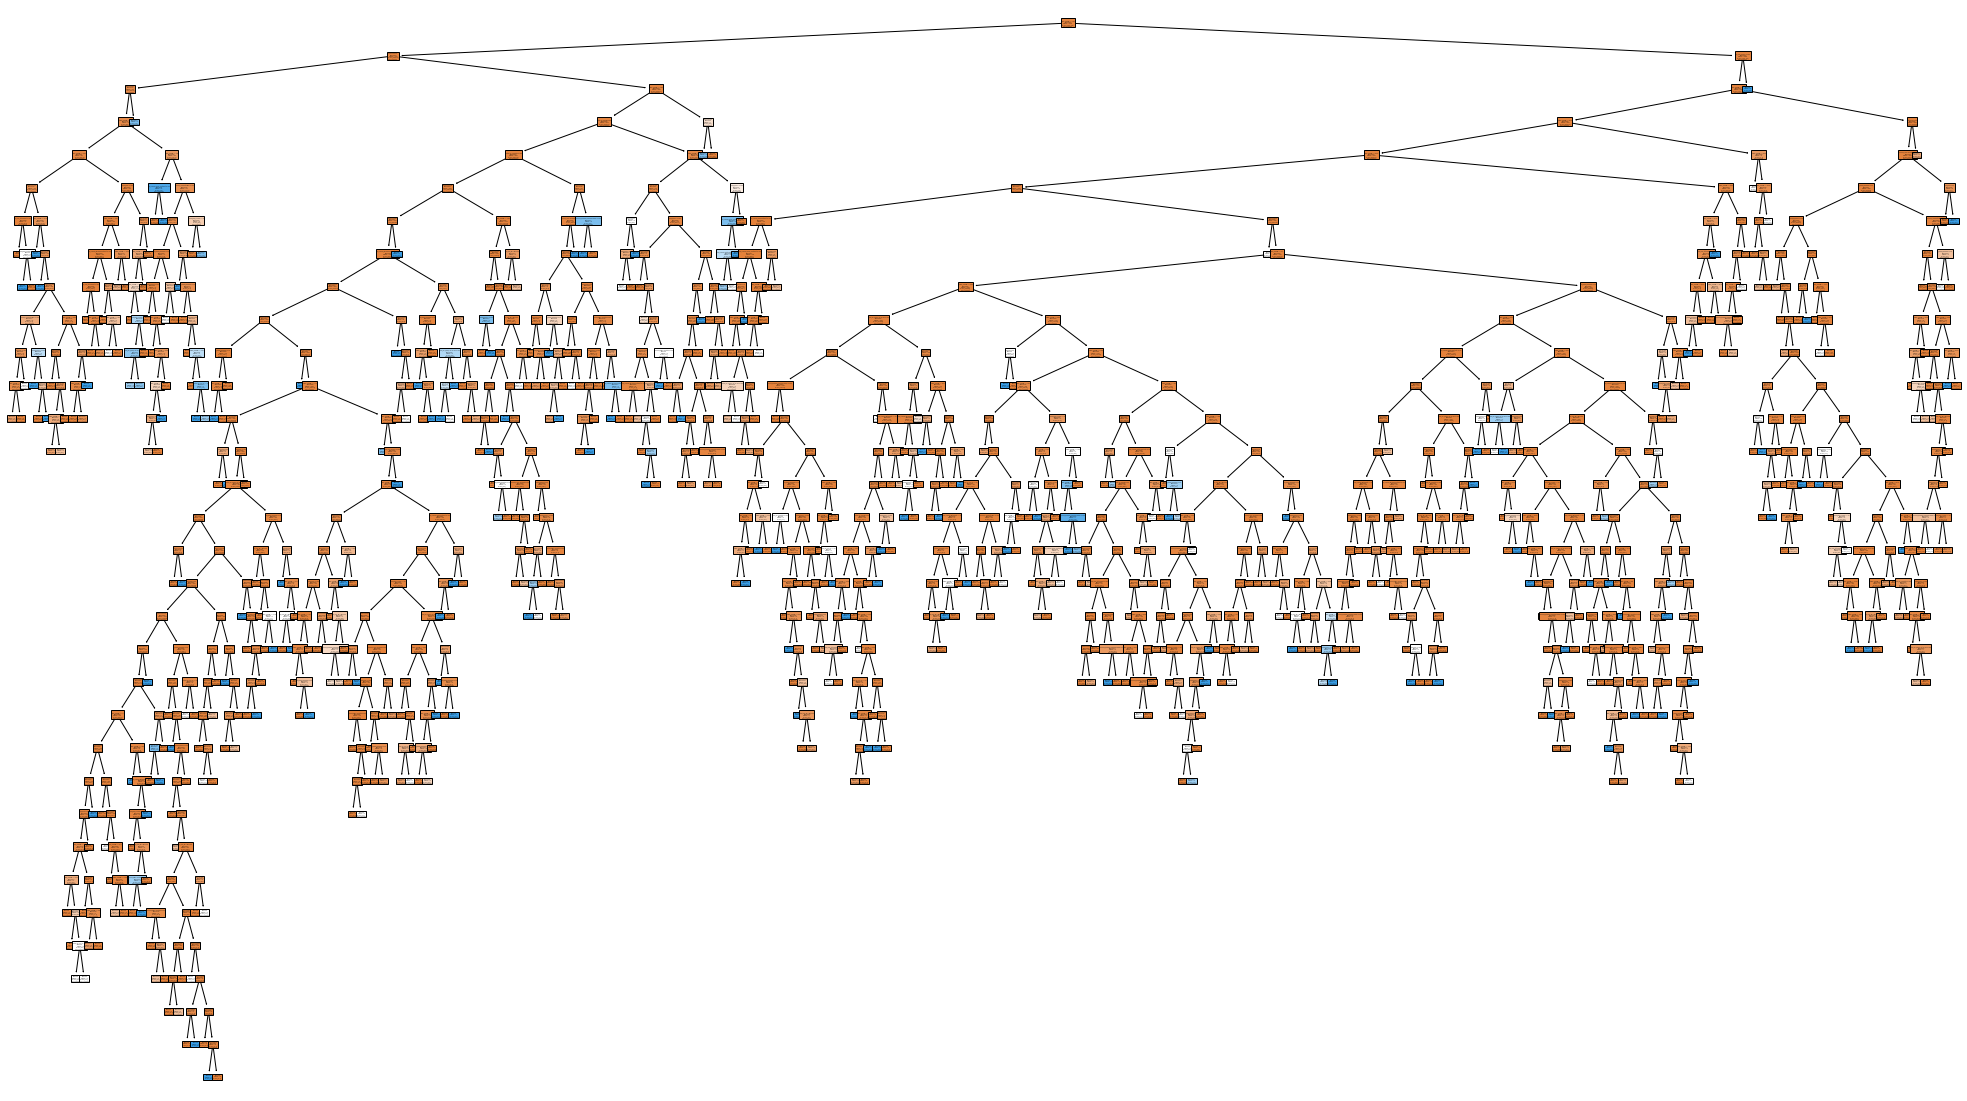

In [8]:
plt.figure(figsize=(35, 20))
plot_tree(clf,
          filled=True,
          class_names=['Aprovado', 'Reprovado'],
          feature_names=x_train.columns)

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


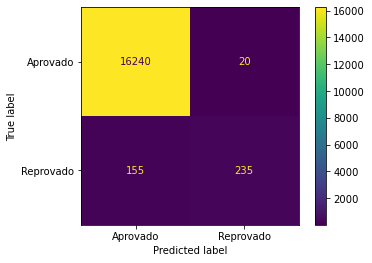

In [9]:
plot_confusion_matrix(clf, x, y, display_labels=['Aprovado', 'Reprovado'])

In [10]:
predict = clf.predict(x)

In [11]:
accuracy_score(y, predict)

0.9894894894894894

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [12]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_train,y_train)

In [13]:
y_chapeu_teste = clf.predict(x_test)
y_chapeu_teste

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


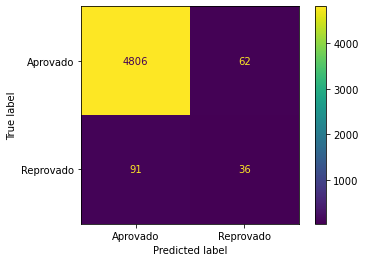

In [14]:
plot_confusion_matrix(clf, x_test,y_test, display_labels=['Aprovado', 'Reprovado'])

In [15]:
accuracy_score(y_test, y_chapeu_teste)

0.9693693693693693

####Treinando a nova árvore

In [16]:
clf_pda = DecisionTreeClassifier(max_depth=10, 
                                 min_samples_leaf=5, 
                                 random_state=123)
clf_pda = clf_pda.fit(x_train,y_train)
predict = clf_pda.predict(x_train)
accuracy_score(y_train, predict)

0.9794079794079794

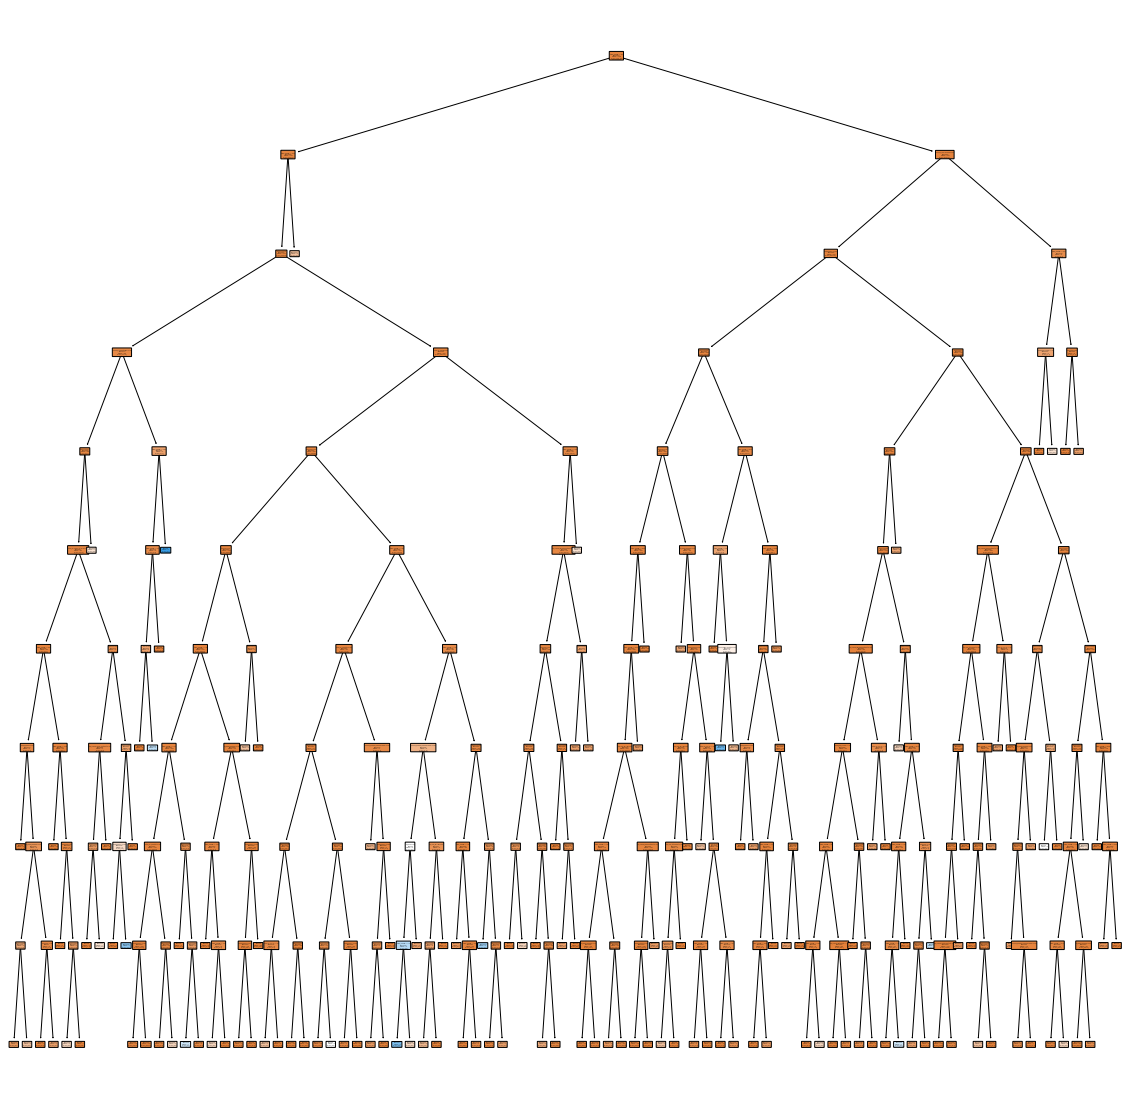

In [17]:
plt.figure(figsize = [20, 20])

plot_tree(clf_pda,
          filled = True,
          rounded = True,
          class_names = ['Aprovado', 'Reprovado'],
          feature_names = x_train.columns);

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


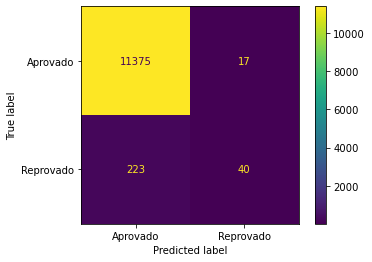

In [18]:
plot_confusion_matrix(clf_pda, x_train, y_train, display_labels = ['Aprovado', 'Reprovado'])

In [19]:
y_train.loc[y_train == 1] = 0

predict = clf_pda.predict(x_train)

accuracy_score(y_train, predict)

0.9951093951093951